In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
training_dataset = pd.read_csv(r"C:\Users\ADMIN\Kaggle_Digit\train.csv")
test_dataset = pd.read_csv(r"C:\Users\ADMIN\Kaggle_Digit\test.csv")

In [4]:
print(training_dataset.shape)
print(test_dataset.shape)

(42000, 785)
(28000, 784)


In [5]:
train_labels = training_dataset["label"] 
training_dataset.drop(["label"], axis = 1, inplace = True)

In [7]:
training_dataset

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train = training_dataset.values.reshape(-1,28,28,1)
test = test_dataset.values.reshape(-1,28,28,1)

In [9]:
train, test = train/255.0, test/255.0

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(train, train_labels, test_size = 0.2, shuffle = True)

In [11]:
CNNmodel = Sequential()
CNNmodel.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
CNNmodel.add(MaxPooling2D((2,2)))
CNNmodel.add(Conv2D(64, (3,3), activation = 'relu'))
CNNmodel.add(MaxPooling2D((2,2)))
CNNmodel.add(Conv2D(64, (3,3), activation = 'relu'))
CNNmodel.add(Flatten())
CNNmodel.add(Dense(64, activation = 'relu'))
CNNmodel.add(Dense(10, activation = 'softmax'))

CNNmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [12]:
CNNmodel.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [19]:
history = CNNmodel.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 20)

Epoch 1/20
1050/1050 [==============================] - 28s 27ms/step - loss: 1.4724 - accuracy: 0.9888 - val_loss: 1.4791 - val_accuracy: 0.9824
Epoch 2/20
1050/1050 [==============================] - 16s 15ms/step - loss: 1.4718 - accuracy: 0.9894 - val_loss: 1.4804 - val_accuracy: 0.9808
Epoch 3/20
1050/1050 [==============================] - 30s 29ms/step - loss: 1.4712 - accuracy: 0.9900 - val_loss: 1.4755 - val_accuracy: 0.9860
Epoch 4/20
1050/1050 [==============================] - 30s 28ms/step - loss: 1.4713 - accuracy: 0.9899 - val_loss: 1.4748 - val_accuracy: 0.9864
Epoch 5/20
1050/1050 [==============================] - 24s 23ms/step - loss: 1.4716 - accuracy: 0.9897 - val_loss: 1.4816 - val_accuracy: 0.9794
Epoch 6/20
1050/1050 [==============================] - 28s 27ms/step - loss: 1.4719 - accuracy: 0.9892 - val_loss: 1.4793 - val_accuracy: 0.9818
Epoch 7/20
1050/1050 [==============================] - 16s 16ms/step - loss: 1.4713 - accuracy: 0.9898 - val_loss: 1.4756 -

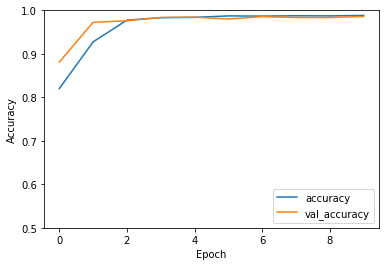

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [15]:
test_loss, test_acc = CNNmodel.evaluate(X_test,  Y_test, verbose=2)
print("Test Accuracy:", test_acc)

263/263 - 2s - loss: 1.4750 - accuracy: 0.9860
Test Accuracy: 0.9859523773193359


In [16]:
predictions = np.argmax(CNNmodel.predict(test), axis = 1)

In [17]:
submission_dataframe = pd.DataFrame({"ImageId" : range(1, 28001), "Label" : predictions})

In [18]:
submission_dataframe.to_csv("submission.csv", index = False)